In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, accuracy_score, f1_score,
    recall_score, precision_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize

# Load Dataset

In [3]:
final = pd.read_csv('test_results/final_predictions.csv')

# Evaluation Metrics

Our team has decided to use the following metrics for final evaluation of our model on the test set:
- Accuracy

- Precision/Recall/F1-score per class

- Macro Precision/Recall/F1-score

- ROC-AUC

These metrics were chosen to ensure that we capture not only the overall correctness of predictions (accuracy), but also the performance on individual classes (precision/recall/F1 per class), the balance across all classes regardless of size (macro averages), and the model’s discriminative ability across thresholds (ROC-AUC).

Confusion Matrix:
             ads  irrelevant  rant  relevant  spam
ads         497           0     0         1     1
irrelevant    0         467     2        61     0
rant          0           0   501         8     0
relevant      0           1     0      2054     2
spam          0           0     0         0   263


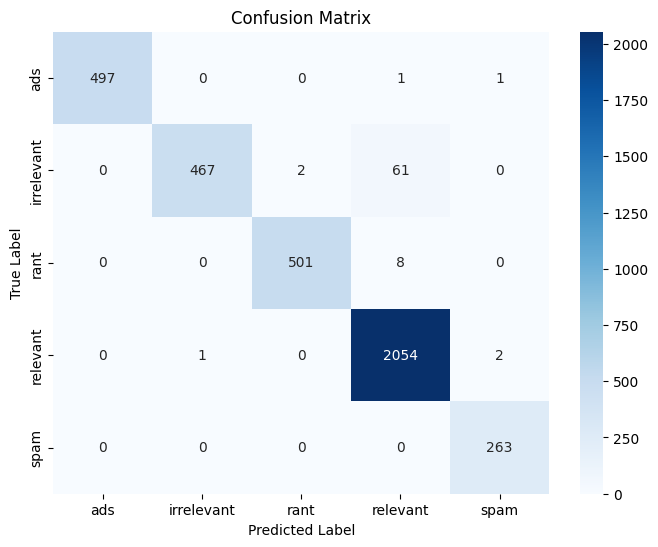

Accuracy: 0.9803

Precision per class: {'ads': 1.0, 'irrelevant': 0.9979, 'rant': 0.996, 'relevant': 0.967, 'spam': 0.9887}
Recall per class: {'ads': 0.996, 'irrelevant': 0.8811, 'rant': 0.9843, 'relevant': 0.9985, 'spam': 1.0}
F1-score per class: {'ads': 0.998, 'irrelevant': 0.9359, 'rant': 0.9901, 'relevant': 0.9825, 'spam': 0.9943}

Macro Precision: 0.9899
Macro Recall: 0.972
Macro F1-score: 0.9802
ROC-AUC (macro, multiclass): 0.997


In [3]:
# --- Define classes ---
classes = ["ads", "irrelevant", "rant", "relevant", "spam"]

# --- True and predicted labels ---
y_true = final["true_label_rule"]
y_pred = final["final_label"]

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred, labels=classes)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
print("Confusion Matrix:\n", cm_df)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# --- Accuracy ---
accuracy = float(round(accuracy_score(y_true, y_pred), 4))
print("Accuracy:", accuracy)

# --- Precision, Recall, F1-score ---
precision_per_class = [float(round(x, 4)) for x in precision_score(y_true, y_pred, labels=classes, average=None)]
recall_per_class = [float(round(x, 4)) for x in recall_score(y_true, y_pred, labels=classes, average=None)]
f1_per_class = [float(round(x, 4)) for x in f1_score(y_true, y_pred, labels=classes, average=None)]

precision_macro = float(round(precision_score(y_true, y_pred, labels=classes, average='macro'), 4))
recall_macro = float(round(recall_score(y_true, y_pred, labels=classes, average='macro'), 4))
f1_macro = float(round(f1_score(y_true, y_pred, labels=classes, average='macro'), 4))

print("\nPrecision per class:", dict(zip(classes, precision_per_class)))
print("Recall per class:", dict(zip(classes, recall_per_class)))
print("F1-score per class:", dict(zip(classes, f1_per_class)))
print("\nMacro Precision:", precision_macro)
print("Macro Recall:", recall_macro)
print("Macro F1-score:", f1_macro)

# --- ROC-AUC (multiclass, One-vs-Rest) ---
score_cols = [f"{cls}_final" for cls in classes]  # must exist in final DataFrame
y_score = final[score_cols].values
y_true_bin = label_binarize(y_true, classes=classes)

roc_auc = float(round(roc_auc_score(y_true_bin, y_score, average='macro', multi_class='ovr'), 4))
print("ROC-AUC (macro, multiclass):", roc_auc)

# Example Reviews

To provide a qualitative illustration of our model’s performance, we will display a few sample reviews from the test set along with the predicted labels generated by our model. 

This helps to contextualize the evaluation metrics and give an intuitive sense of how the model classifies real examples.

In [4]:
initial = pd.read_csv('final_data/cleaned_dataset.csv')
merged = final.merge(initial, on='review_id', how='left')

In [5]:
n = 3
examples_per_class = merged[['review', 'rating', 'business_name', 'business_desc', 'final_label']]
examples_per_class

,review,rating,business_name,business_desc,final_label
0,"As previous reviews have stated, two small pie...",4.0,Carnegie Deli,"['Deli', 'Takeout Restaurant', 'Sandwich shop']",relevant
1,Good fresh food... always clean and employees ...,5.0,MTO Cafe,"['American restaurant', 'Cafe']",relevant
2,The soups are delicious the desserts are fanta...,5.0,Grape Vine Cafe,['Italian restaurant'],relevant
3,Great selection great prices. Has a teacher di...,5.0,Zia Records (Eastern Las Vegas),['Music store'],relevant
4,Fun!!! Fun!!! Love Laughlin it's just perfect ...,4.0,Don Laughlin's Riverside Resort Hotel and Casino,"['Resort hotel', 'Casino', 'Hotel']",relevant
...,...,...,...,...,...
3853,No cap this is just a dot on maps fr.,2.0,Legends Hair Salon,['Beauty salon'],irrelevant
3854,Sheesh this location exists ig.,2.0,Peppermill Resort Spa Casino,"['Resort hotel', 'Casino', 'Day spa', 'Hotel']",irrelevant
3855,"Just had the best workout today, this place ex...",2.0,Hair Of The Dog Pet Concierge,"['Dog day care center', 'Boarding house', 'Dog...",irrelevant
3856,Never gonna give you up—this place is on the map.,3.0,Michaels,"['Craft store', 'Art supply store', 'Picture f...",irrelevant


# Findings

- Our model works extremely well in classifying the reviews into their respective labels. 

- Among the misclassified cases, the most common error was irrelevant reviews being predicted as relevant reviews. 

- This could be due to the overlap in language between irrelevant reviews and genuine relevant reviews - for instance, irrelevant reviews may still contain product - or service-related keywords that the model interprets as informative. 

- Another possibility is that the proportion of irrelevant reviews in the dataset is relatively smaller, leading to class imbalance and reduced sensitivity for this category.

# Improvements

- **Address data imbalance:** Implement more robust strategies for handling class imbalance, such as advanced data augmentation, synthetic label generation, or weighted loss functions, to improve performance on underrepresented classes. For this hackathon, we had to source our own data, which limited the coverage of certain classes; in a production environment, companies would have richer datasets across all categories.

- **Optimize model trade-offs:** Explore lighter transformer architectures or efficient DNN designs to maintain strong accuracy while improving inference speed for hackathon-scale prototyping and potential real-time deployment.

- **Enhance scalability:** Design modular and adaptable pipelines that can efficiently handle a growing volume of data, ensuring the model can scale to a large user base like TikTok’s global platform.

- **Handle edge cases:** Refine rules and incorporate additional metadata to better distinguish subtle categories, such as differentiating genuine negative feedback from “rant” reviews, improving classification robustness.